In [38]:
corpus1_urls = [
'https://www.gutenberg.org/cache/epub/32032/pg32032.txt',
'https://www.gutenberg.org/cache/epub/32154/pg32154.txt',
'https://www.gutenberg.org/cache/epub/32522/pg32522.txt',
'https://www.gutenberg.org/cache/epub/31547/pg31547.txt',
'https://www.gutenberg.org/cache/epub/73595/pg73595.txt'
]
corpus1_label = 'PKD Asimov Herbert'

corpus2_urls = [
'https://www.gutenberg.org/cache/epub/2197/pg2197.txt',
'https://www.gutenberg.org/cache/epub/2302/pg2302.txt',
'https://www.gutenberg.org/cache/epub/1754/pg1754.txt',
'https://www.gutenberg.org/cache/epub/13416/pg13416.txt',
'https://www.gutenberg.org/cache/epub/1944/pg1944.txt',
]

corpus2_label = 'Dostoyevsky Chekhov'

In [39]:
import requests
import os
import re
from os.path import basename

directory = 'Corpus'

if not os.path.exists(directory):
    os.makedirs(directory)


def download(url):
    response = requests.get(url)
    if response:
        file_name = basename(url)
        out = open(file_name,'w',encoding='utf-8')
        out.write(response.text)
        out.close()

def download_to_corpus(url):
    response = requests.get(url)
    if response:
        file_name = basename(url)
        path = os.path.join(directory,file_name)
        out = open(path,'w',encoding='utf-8')
        out.write(response.text)
        out.close()

def find_title(file_name):
    title = basename(file_name)
    title = re.sub('%20',' ',title)
    title = re.sub(r'\'','',title)
    title = re.sub('.txt$','',title.strip())
    return title

def clean_wordlist(words):
    words = [word for word in words if word not in string.punctuation]
    words = [word for word in words if word not in stopwords]
    words = [re.sub(r'([….])|(\')','',word) for word in words]
    words = [word for word in words if re.search(r'\w', word)]
    return words

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


import sys
!pip install vaderSentiment
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('punkt_tab')


download('https://raw.githubusercontent.com/peterverhaar/dmt-2024/refs/heads/main/Assignment3/text_mining.py')

for url in corpus1_urls:
    download_to_corpus(url)

for url in corpus2_urls:
    download_to_corpus(url)


out = open('metadata.csv','w',encoding='utf-8')
out.write('text,category\n')
for url in corpus1_urls:
    out.write(f"{find_title(basename(url))},'{corpus1_label}'\n")
for url in corpus2_urls:
    out.write(f"{find_title(basename(url))},'{corpus2_label}'\n")

out.close()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [40]:
import requests
import re
import os
import string
string.punctuation += '-•“”’– '
from text_mining import *

from os.path import join

from nltk import word_tokenize,sent_tokenize,pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

stopwords = stopwords.words('english')

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
ana = SentimentIntensityAnalyzer()


In [41]:
corpus = os.listdir(directory)
corpus = [os.path.join(directory,text) for text in corpus if re.search(r'txt$',text) and not(re.search(r'lemma',text))]

for text in corpus:
    print(text)

metadata = pd.read_csv('metadata.csv')

Corpus/pg13416.txt
Corpus/pg73595.txt
Corpus/pg32522.txt
Corpus/pg2302.txt
Corpus/pg1944.txt
Corpus/pg31547.txt
Corpus/pg1754.txt
Corpus/pg32154.txt
Corpus/pg2197.txt
Corpus/pg32032.txt


## Linguistic features

For each text, the number of characters, the number of words and the number of sentences are calculated. Using these data, we can compare the avarage word lengths and the average sentence lengths of all the novels.

In [42]:
data = []

for file in corpus:
    print(f'Analysing {file} ... ')
    row = []
    text = open(file,encoding='utf-8')
    full_text = text.read()

    # Calculate number of characters (without spaces)
    full_text_no_spaces = re.sub( r'\s','',full_text)
    nr_characters = len(full_text)

    # Calculate number of words
    words = word_tokenize(full_text.lower())
    words = remove_punctuation(words)
    nr_tokens = len(words)

    avg_word_length = nr_characters / nr_tokens

    row.append(nr_tokens)
    row.append(nr_characters)
    row.append(avg_word_length)

    sentences = sent_tokenize(full_text)
    nr_sentences = len(sentences)
    row.append(nr_sentences)
    avg_sent_length = nr_tokens/nr_sentences

    row.append(avg_sent_length)

    first_2000 = words[:2000]
    unique = list(set(first_2000))
    ttr = len(unique)/len(first_2000)
    row.append(ttr)

    row.append(find_title(file))
    category = metadata.query( f"text=='{find_title(file)}' " )['category'].values[0]
    row.append(category)
    data.append(row)

columns = ['nr_tokens','nr_characters','word_length','nr_sentences','words_per_sentence','ttr','title','category']
df = pd.DataFrame(data, columns = columns)

Analysing Corpus/pg13416.txt ... 
Analysing Corpus/pg73595.txt ... 
Analysing Corpus/pg32522.txt ... 
Analysing Corpus/pg2302.txt ... 
Analysing Corpus/pg1944.txt ... 
Analysing Corpus/pg31547.txt ... 
Analysing Corpus/pg1754.txt ... 
Analysing Corpus/pg32154.txt ... 
Analysing Corpus/pg2197.txt ... 
Analysing Corpus/pg32032.txt ... 


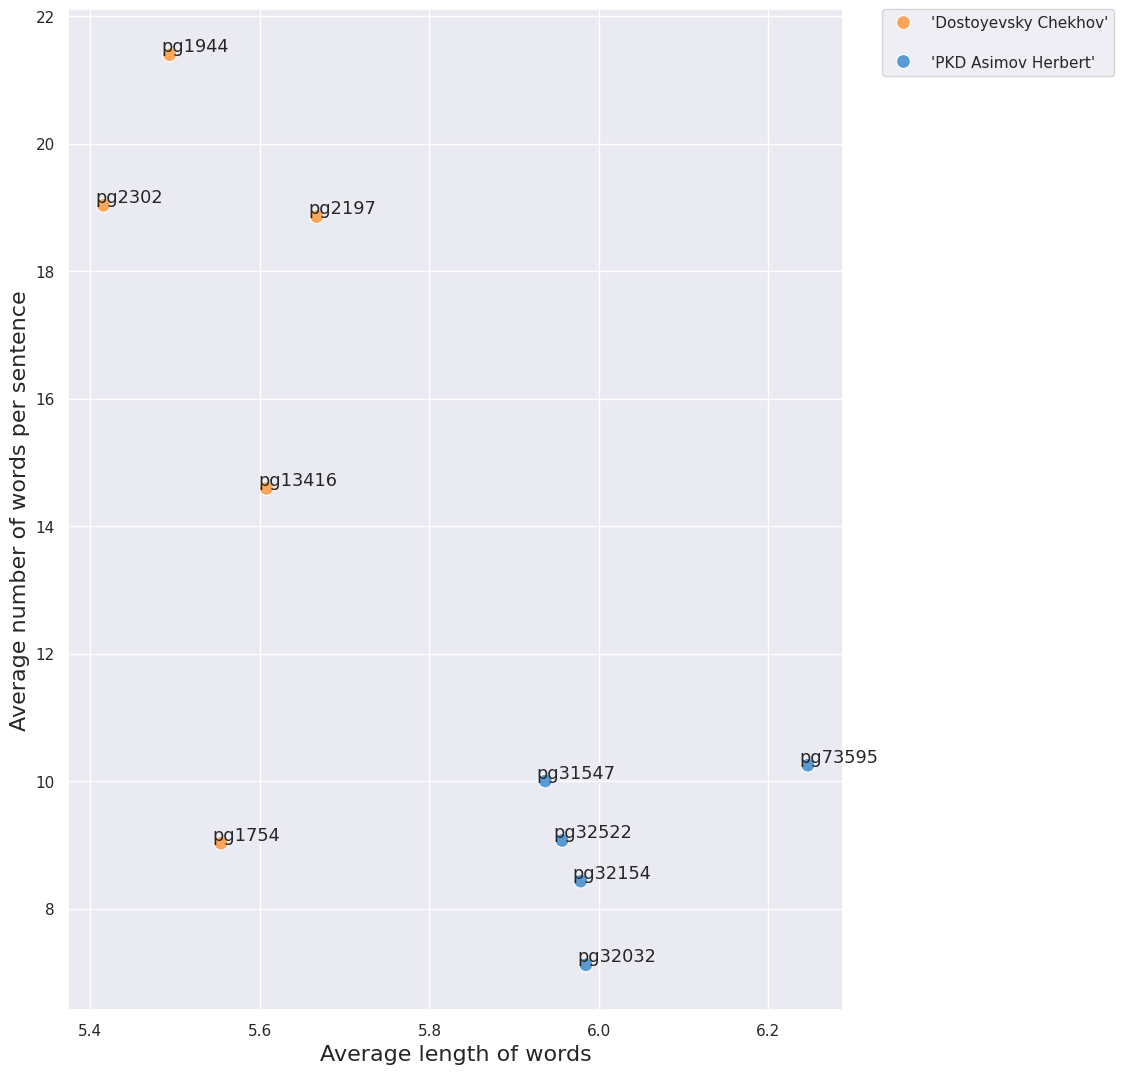

In [43]:
x_axis = 'word_length'
y_axis =  'words_per_sentence'
hue = 'category'

colours = ['#f9a65a','#599ad3']

fig = plt.figure( figsize = ( 10,13 ))

## This line adds spacing in between the lines of the legend
sns.set(rc = {'legend.labelspacing': 1.6})

ax = sns.scatterplot( data=df, x=x_axis, y=y_axis,
                     hue = hue,  palette=colours ,  s=100 )

for index, row in df.iterrows():
    plt.text( row[x_axis]-0.01, row[y_axis]+0.05 , row['title'] , fontsize=12.8)


ax.set_xlabel( 'Average length of words'  , fontsize = 16 )
ax.set_ylabel( 'Average number of words per sentence'  , fontsize = 16 )
#ax.set_title( '' , fontsize=24 )
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);

plt.savefig( 'scatterplot.png' , dpi=300 )

## Type-token ratio

The type-token ratio can be calculated by dividing the number of unique words (the types) by the total number of words (the tokens). The number gives [an indication of the lexical diversity](https://cdsleiden.github.io/tdm-tutorial/notebooks/5%20Type-token_ratio.html).

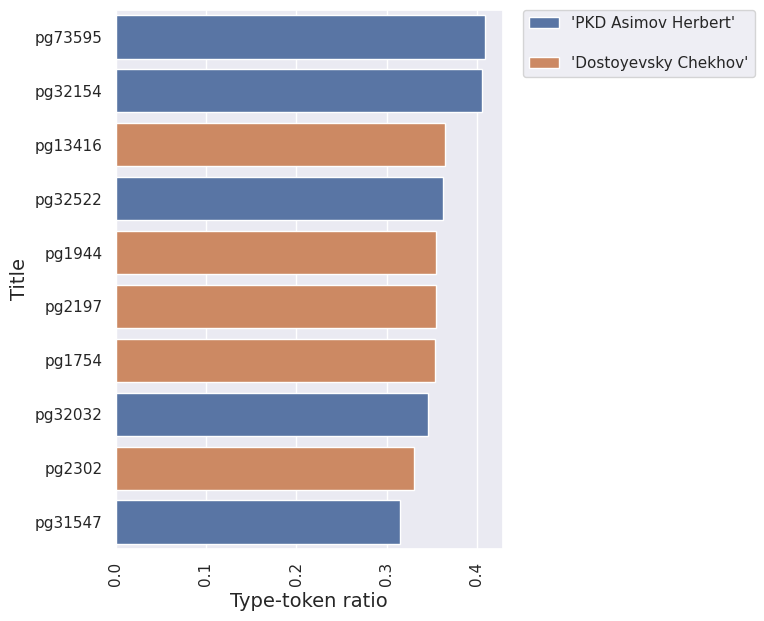

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = 'ttr'
y_axis = 'title'
hue = 'category'

colours = ['#599ad3','#f9a65a']

fig = plt.figure( figsize=( 5,7 ) )

df_sorted = df.sort_values(by=[ x_axis] , ascending = False)

graph = sns.barplot( data=df_sorted , x=x_axis, y=y_axis,
                   hue = hue , dodge = False)

#graph.set_title('' , size = 20)
graph.set_xlabel('Type-token ratio' , size = 14)
graph.set_ylabel('Title' , size = 14 )

plt.xticks(rotation= 90)

plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);

plt.show()

## Most frequent words

The words have been lemmatised first.

In [45]:
for file in os.listdir(directory):
    if re.search( 'lemma.txt',file ):
        path = os.path.join(directory,file)
        with open(path,encoding='utf') as fh:
            full_text = fh.read()
            words = word_tokenize(full_text.lower())
            # stopwords and punctuation is removed
            words = clean_wordlist(words)
            freq = Counter(words)
            key = re.sub('_lemma','',path)
            print(f"\n{find_title(key)}\n")
            for word,count in freq.most_common(15):
                print(f'{word} ({count})')



pg13416

say (501)
go (480)
come (238)
look (226)
love (202)
nt (193)
laptev (178)
make (169)
man (169)
little (166)
day (163)
time (160)
see (160)
take (157)
begin (155)

pg1944

say (515)
go (475)
look (312)
come (264)
old (251)
man (221)
little (200)
take (195)
get (181)
time (170)
see (167)
day (158)
begin (155)
work (145)
know (143)

pg32522

kramer (147)
say (110)
project (94)
work (92)
gross (87)
ship (87)
nt (77)
go (63)
gutenberg™ (57)
come (43)
look (41)
control (40)
get (40)
back (36)
man (35)

pg31547

say (148)
nt (126)
red (102)
project (89)
work (80)
slim (71)
gutenberg™ (57)
look (48)
come (46)
get (43)
astronomer (42)
industrialist (42)
think (40)
go (39)
animal (35)

pg32032

hendricks (217)
come (119)
say (105)
nt (97)
get (94)
tasso (92)
project (88)
klaus (86)
work (85)
go (76)
back (65)
way (62)
gutenberg™ (57)
bunker (55)
see (53)

pg2302

say (207)
know (201)
go (166)
work (155)
come (154)
think (153)
see (150)
well (142)
man (141)
write (120)
old (119)
even (1

## Unique words

In [46]:
categories = list(metadata['category'].unique())

corpus1 = []
corpus2 = []
corpus1_freq = Counter()
corpus2_freq = Counter()

for text in corpus:
    category = metadata.query( f"text=='{find_title(text)}' " )['category'].values[0]
    if category == categories[0]:
        corpus1.append(text)
    else:
        corpus2.append(text)

for text in corpus1:
    file = open(text,encoding='utf-8')
    full_text = file.read()
    words = word_tokenize(full_text.lower())
    words = remove_punctuation_and_stopwords(words)
    corpus1_freq.update(words)


for text in corpus2:
    file = open(text,encoding='utf-8')
    full_text = file.read()
    words = word_tokenize(full_text.lower())
    words = remove_punctuation_and_stopwords(words)
    corpus2_freq.update(words)

In [47]:
print(f'The list below indicates the 20 most frequent words in the {categories[0]} subcorpus.\n')

for word,count in corpus1_freq.most_common(20):
    print(f'{word} => {count}')

The list below indicates the 20 most frequent words in the 'PKD Asimov Herbert' subcorpus.

said => 579
project => 448
work => 293
one => 227
reinhart => 221
back => 217
hendricks => 217
could => 192
sherikov => 179
ship => 174
cole => 174
see => 169
works => 167
around => 166
way => 166
right => 166
like => 164
would => 163
get => 157
gutenberg => 155


In [48]:
print(f'The list below indicates the 20 most frequent words in the {categories[1]} subcorpus.\n')

for word,count in corpus2_freq.most_common(20):
    print(f'{word} => {count}')

The list below indicates the 20 most frequent words in the 'Dostoyevsky Chekhov' subcorpus.

one => 1192
said => 959
would => 908
man => 633
old => 633
could => 610
though => 581
little => 554
go => 533
like => 531
time => 524
see => 520
went => 478
come => 478
must => 472
know => 469
project => 443
even => 430
well => 410
never => 393


In [49]:
print(f'The following words from the {categories[0]} subcorpus are NEVER used in the {categories[1]} subcorpus\n')

for word,count in corpus1_freq.most_common():
    if word not in corpus2_freq.keys():
        print(word)

The following words from the 'PKD Asimov Herbert' subcorpus are NEVER used in the 'Dostoyevsky Chekhov' subcorpus

reinhart
hendricks
sherikov
cole
kramer
tasso
francine
ohashi
klaus
langsmith
dixon
speidel
terra
bomb
bunker
zakheim
major
icarus
industrialist
astronomer
commissioner
srb
pilot
gray
wiring
steven
spaceship
duffe
rudi
thomas
centaurus
team
variable
turret
margaret
goré
ships
guards
galactics
dolores
lab
centauran
scott
planets
explorer
planet
dad
defense
debris
kaplan
cars
emergency
underground
range
robot
earl
area
relays
car
controls
tunnel
philip
bubble
galactic
speaker
proxima
vidscreen
worlds
vidsender
leone
soviet
transmitter
millar
weeds
briefcase
hiko
atomic
weapon
ftl
explosion
particles
american
center
film
terran
frantically
tools
slag
radiation
davids
zak
cruiser
systems
gaining
hatch
concrete
units
runner
lid
grunted
weapons
illustration
bombs
dances
automatic
grinned
drifting
blasted
favor
tube
sally
eric
missiles
teddy
slowed
concourse
pressure
dot
galaxy
r

In [50]:
print(f'The following words from the {categories[1]} subcorpus are NEVER used in the {categories[0]} subcorpus\n')

for word,count in corpus2_freq.most_common():
    if word not in corpus1_freq.keys():
        print(word)

Streaming output truncated to the last 5000 lines.
infant
glimmer
phantoms
peas
icicles
wag
firewood
wheat
fontanka
canal
striped
emaciated
rancid
savours
idiot
ivanushka
attire
inspire
pulls
adjudged
adorned
suppliant
hearken
kennel
fitting
impetuous
whim
hovering
articulate
demurred
contracted
persisted
tribunal
executing
diffident
touchy
grimace
salute
sequel
pursue
obstinacy
manhood
dispersed
funds
sieve
benefited
fuel
expose
railed
purchases
displeasure
lapse
vigour
smilingly
23rd
sworn
morality
inscrutable
awaits
blouses
purchased
valet
gewgaws
jeweller
gala
verified
deeds
remnants
darlings
jewel
route
endearment
durable
2006
2016
malefactor
victorious
menacingly
contours
countenance
squatting
anxiously
waddling
malignantly
curse
bitch
martyrs
singsong
judas
cured
notions
wagged
witchery
sticking
untying
gulyaevsky
nicolas
fidgeted
muscular
postal
inwardly
highroad
doubted
prodded
beds
sunflower
kapluntsev
cages
exemption
soot
trellis
immensely
tenors
wench
trinity
streaming
munc

## Dunning’s log likelihood

One of statistical methods that can be used to find such distinctive words is Dunning’s log likelihood. In short, it analyses the distinctiveness of word in one set of texts compared to the texts in a reference corpus, by calculating probabilities based on word frequencies. A good explanation of the fomula can be found on the [wordHoard](https://wordhoard.northwestern.edu/userman/analysis-comparewords.html#loglike) website.

Using the frequencies that have been calculated above, the Dunning log likelihood scores are calculated for all of the words that occur both in corpus1 and corpus2 in the cell below. The actual calculation takes place in a method named `log_likelihood()`. The scores that are calculated are all stored in a dictionary named ll_scores

The formula that is implemented in the log_likelihood method returns a number which can either be positive or negative. A postive score indicates that there is a high probability that the word will be used in the first corpus. A negative probability indicates that occurence of the word is more common in the second corpus. The tokens that are assigned the highest scores, in other words, are also most distincive of the first corpus.

The code below lists the words that are assigned a positive log likelihood score in the first corpus.

See also [TDM tutorial, chapter on Diction](https://cdsleiden.github.io/tdm-tutorial/notebooks/9%20Diction.html)

In [51]:
total1 = sum(corpus1_freq.values())
total2 = sum(corpus2_freq.values())

In [52]:
ll_scores = dict()


for word in corpus1_freq.keys():
    if word in corpus2_freq.keys():

        ll_score = log_likelihood( corpus1_freq[word] , corpus2_freq[word] , total1 , total2 )
        ll_scores[word] = ll_score

max = 25
i = 0


In [53]:
print(f'The following words are most distinctive in the {categories[0]} subcorpus\n')


for word in sorted_by_value(ll_scores , ascending = False ):
    print( word , ll_scores[word] )
    i += 1
    if i == max:
        break

The following words are most distinctive in the 'PKD Asimov Herbert' subcorpus

ship 380.4591709632892
toward 319.30820479216675
project 251.56879675345004
around 245.5286847715744
war 205.6683990093143
gross 198.28334078859248
machines 176.32914593008977
slim 157.42553423016503
back 135.9615509555153
control 122.51136762699284
slowly 114.45728072155713
claws 114.16941093726308
metal 113.32466378202432
surface 111.22942589257354
said 111.05240273030546
ash 109.84766789328967
work 105.31401259272681
space 86.66291768088418
security 86.2396264337996
nodded 85.79473619489539
ca 85.5468131229507
maybe 84.41100665954119
gutenberg 84.06001055437221
gun 83.45791490221276
animals 81.76258407763157


In [54]:
print(f'The following words are most distinctive in the {categories[1]} subcorpus\n')

max = 25
i = 0

for word in sorted_by_value(ll_scores ) :
    print( word , ll_scores[word] )
    i += 1
    if i == max:
        break

The following words are most distinctive in the 'Dostoyevsky Chekhov' subcorpus

though -242.01638217791836
upon -143.01711211936532
went -123.56486941708062
mother -121.46783954841246
home -115.04876941985783
old -107.47640402190231
yet -95.15226381730186
shall -95.08669362584673
also -94.45187022764497
god -94.1104909518103
never -79.75810037283262
money -78.9356889525826
heart -78.50001236597043
always -78.29446164215483
one -73.58161452954178
seemed -70.60943436375773
poor -70.54450371607273
every -69.48897625559715
would -65.73463890974003
village -64.54074706805636
day -62.69187038079775
lady -62.2686058687404
little -60.81872935245603
father -57.92659649363727
indeed -56.463647255264036


## Bigrams

In [55]:
import nltk
from nltk.util import ngrams

bigrams = Counter()

for text in corpus1:
    file = open(text,encoding='utf-8')
    full_text = file.read()
    words = word_tokenize(full_text.lower())
    words = remove_punctuation_and_stopwords(words)
    n_grams = ngrams(words, 2)
    bigrams.update([ ' '.join(grams) for grams in n_grams])

for bigram,count in bigrams.most_common(19):
    print(f"{bigram} => {count}")

project gutenberg => 155
project electronic => 90
electronic works => 80
united states => 79
gutenberg literary => 65
literary archive => 65
archive foundation => 60
electronic work => 55
terms agreement => 45
set forth => 40
project license => 40
shook head => 37
full project => 35
gross said => 30
said ohashi => 27
kramer said => 27
margaret duffe => 26
hendricks said => 26
protected copyright => 25


In [56]:
bigrams = Counter()

for text in corpus2:
    file = open(text,encoding='utf-8')
    full_text = file.read()
    words = word_tokenize(full_text.lower())
    words = remove_punctuation_and_stopwords(words)
    n_grams = ngrams(words, 2)
    bigrams.update([ ' '.join(grams) for grams in n_grams])

for bigram,count in bigrams.most_common(19):
    print(f"{bigram} => {count}")

old man => 194
project gutenberg => 157
de griers => 95
project electronic => 90
old lady => 82
electronic works => 80
united states => 75
mlle blanche => 75
makar alexievitch => 68
gutenberg literary => 65
literary archive => 65
every day => 61
let us => 61
every one => 60
archive foundation => 60
long time => 57
electronic work => 55
one another => 53
old woman => 46


## Part of Speech tagging and Lemmatisation

In [57]:


data = []
all_novels = []
lemmatiser = WordNetLemmatizer()

# Dictionaries to save all nouns, adjectives, adverbs and nouns
all_adj_adv_noun = dict()
all_verbs = dict()

adj_noun_pos = ['JJ','JJR','RB','RDR','RBS','NN','NNS','NNP']
verbs_pos = ['VB','VBD','VBG','VBN']

# Dictionary to save number of tokens
nr_tokens = dict()

for file in corpus:
    lemmatised = ''
    pos_tags = dict()

    # Pos categories in the current text
    adj_adv_noun = []
    verbs = []

    count_tokens = 0

    out_file = re.sub( r'\.txt$' , '_lemma.txt', file)

    print(f'Analysing {file} ... ')

    text = open(file,encoding='utf-8')
    full_text = text.read()
    sentences = sent_tokenize(full_text)

    for sentence in sentences:
        words = word_tokenize(sentence)
        words = clean_wordlist(words)
        pos = pos_tag(words)

        for i,word in enumerate(words):
            word = word.lower()

            pos_tags[pos[i][1]] = pos_tags.get(pos[i][1],0)+1

            posTag = ptb_to_wordnet( pos[i][1] )
            if re.search( r'\w+' , posTag , re.IGNORECASE ):
                lemma = lemmatiser.lemmatize( words[i] , posTag )
                lemmatised += lemma + ' '
                count_tokens += 1

                if len(lemma)>0:

                    if pos[i][1] in adj_noun_pos:
                        adj_adv_noun.append(lemma.lower())
                    if pos[i][1] in verbs_pos:
                        verbs.append(lemma.lower())

        lemmatised += '\n'

    all_adj_adv_noun[file] = adj_adv_noun
    all_verbs[file] = verbs
    nr_tokens[file] = count_tokens
    all_novels.append(file)

    with open(out_file,'w',encoding='utf-8') as out:
        out.write(lemmatised)


    total = sum(pos_tags.values())
    row = []
    row.append(find_title(file))
    category = metadata.query( f"text=='{find_title(file)}' " )['category'].values[0]
    row.append(category)
    row.append(pos_tags.get('MD',0)/total)
    row.append(pos_tags.get('FW',0)/total)
    row.append(pos_tags.get('JJ',0)/total)
    row.append((pos_tags.get('JJR',0)+pos_tags.get('JJS',0))/total)
    row.append(pos_tags.get('RB',0)/total)
    row.append((pos_tags.get('RBR',0)+pos_tags.get('RBS',0))/total)
    data.append(row)

df_pos = pd.DataFrame(data,columns=['title','category','modal_verb','foreign_word','adj','adj-comp-super','adv','adv-comp-super'])


Analysing Corpus/pg13416.txt ... 
Analysing Corpus/pg73595.txt ... 
Analysing Corpus/pg32522.txt ... 
Analysing Corpus/pg2302.txt ... 
Analysing Corpus/pg1944.txt ... 
Analysing Corpus/pg31547.txt ... 
Analysing Corpus/pg1754.txt ... 
Analysing Corpus/pg32154.txt ... 
Analysing Corpus/pg2197.txt ... 
Analysing Corpus/pg32032.txt ... 


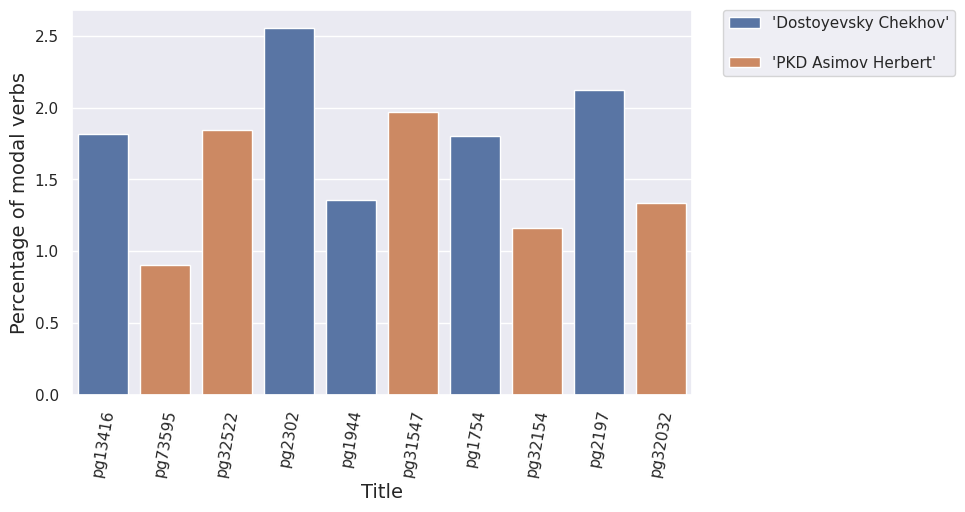

In [58]:
df_pos['modal_verb'] = df_pos['modal_verb']*100

fig = plt.figure( figsize=( 8,5 ) )


graph = sns.barplot( data=df_pos,x='title', y='modal_verb',
                   hue = 'category', dodge = False)

#graph.set_title('' , size = 20)
graph.set_xlabel('Title' , size = 14)
graph.set_ylabel('Percentage of modal verbs' , size = 14 )

plt.xticks(rotation=80)
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);
plt.show()

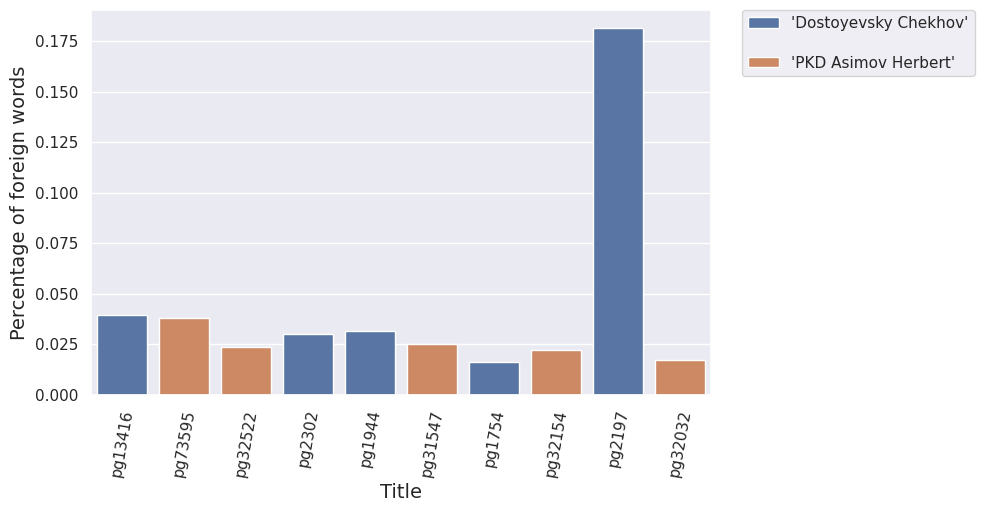

In [59]:
df_pos['foreign_word'] = df_pos['foreign_word']*100

fig = plt.figure( figsize=( 8,5 ) )


graph = sns.barplot( data=df_pos,x='title', y='foreign_word',
                    hue = 'category' , dodge = False )

#graph.set_title('' , size = 20)
graph.set_xlabel('Title' , size = 14)
graph.set_ylabel('Percentage of foreign words' , size = 14 )

plt.xticks(rotation=80)
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);
plt.show()

In [60]:
df_pos['adj-comp-super'] = df_pos['adj-comp-super']*100
df_pos['adj'] = df_pos['adj']*100
df_pos['adv-comp-super'] = df_pos['adv-comp-super']*100
df_pos['adv'] = df_pos['adv']*100

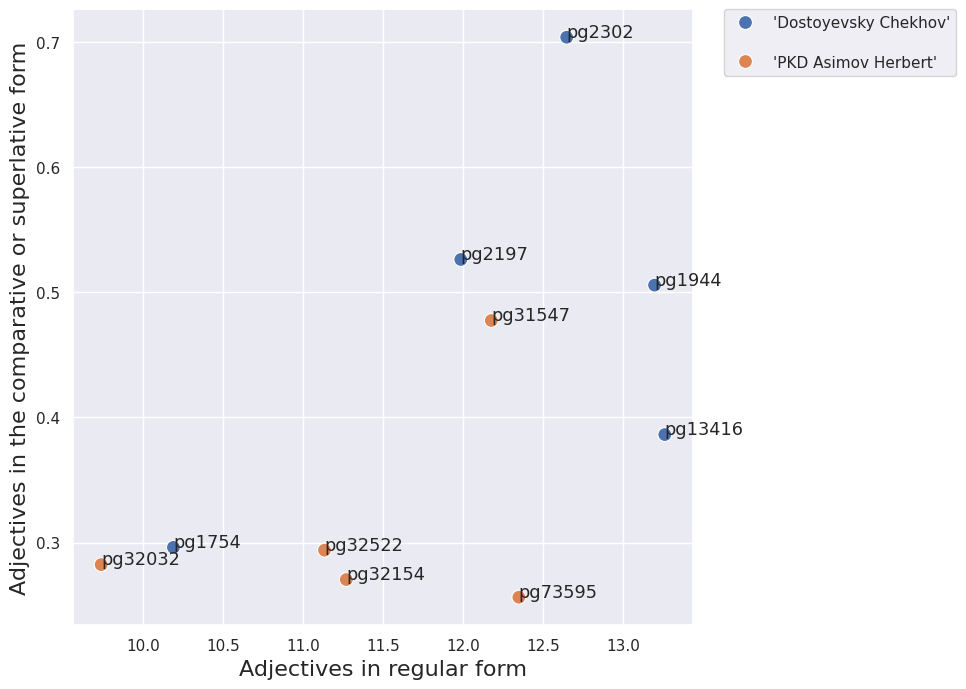

In [61]:
fig = plt.figure( figsize = ( 8,8 ))

x_axis='adj'
y_axis='adj-comp-super'

## This line adds spacing in between the lines of the legend
sns.set(rc = {'legend.labelspacing': 1.6})

ax = sns.scatterplot( data=df_pos, x=x_axis, y=y_axis,
                     hue = 'category',  s=100 )

for index, row in df_pos.iterrows():
    plt.text( row[x_axis], row[y_axis], row['title'] , fontsize=12.8)

ax.set_xlabel( 'Adjectives in regular form'  , fontsize = 16 )
ax.set_ylabel( 'Adjectives in the comparative or superlative form'  , fontsize = 16 )
#ax.set_title( '' , fontsize=24 )
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);
plt.show()

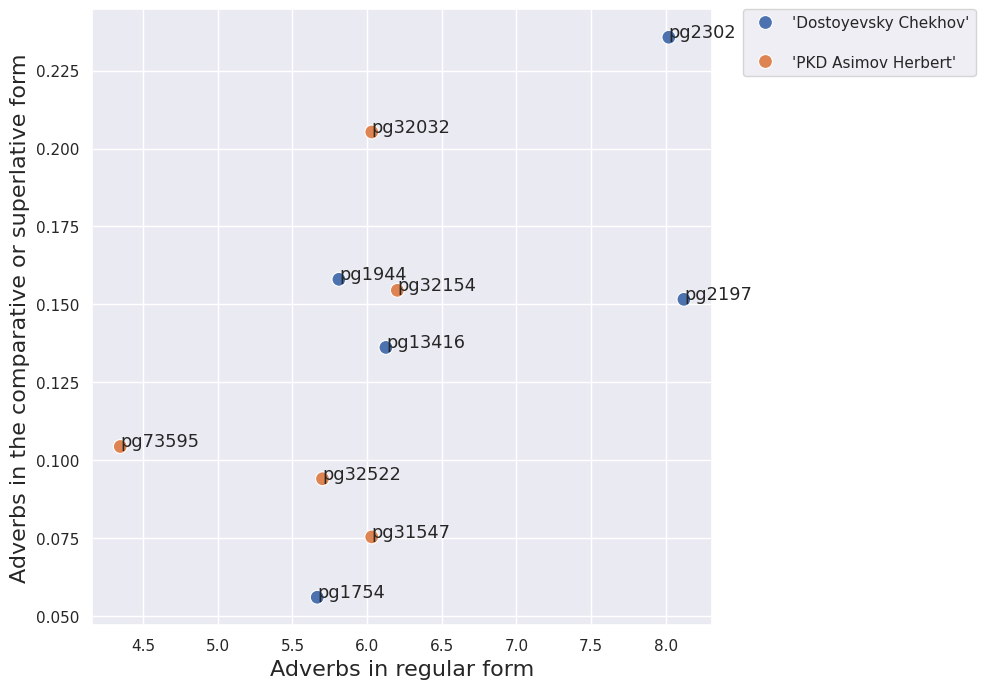

In [62]:
fig = plt.figure( figsize = ( 8,8 ))

x_axis='adv'
y_axis='adv-comp-super'

## This line adds spacing in between the lines of the legend
sns.set(rc = {'legend.labelspacing': 1.6})

ax = sns.scatterplot( data=df_pos, x=x_axis, y=y_axis,
                     hue='category',  s=100 )

for index, row in df_pos.iterrows():
    plt.text( row[x_axis], row[y_axis] , row['title'] , fontsize=12.8)


ax.set_xlabel( 'Adverbs in regular form'  , fontsize = 16 )
ax.set_ylabel( 'Adverbs in the comparative or superlative form'  , fontsize = 16 )
#ax.set_title( '' , fontsize=24 )
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);
plt.show()

## Hypernyms

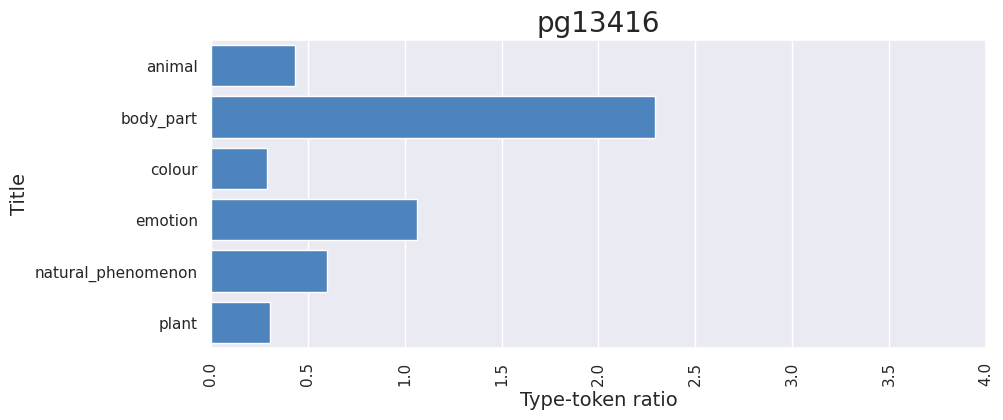



Most common emotions in "pg13416"

love (202); happiness (21); spite (13); alarm (13); joy (11); terror (9); horror (8); fear (8); quiver (8); vexation (6); hatred (6); ecstasy (5); rapture (4); jealousy (4); envy (4); 

Most common colours in "pg13416"

black (29); red (18); green (15); crimson (12); blue (8); yellow (5); pink (3); brown (2); claret (1); paleness (1); purple (1); pallor (1); ebony (1); drab (1); 

Most common body_parts in "pg13416"

hand (133); face (116); eye (97); back (64); head (48); shoulder (33); foot (28); arm (24); small (17); cheek (17); neck (13); chest (13); finger (12); nose (11); knee (10); 

Most common natural phenomena in "pg13416"

light (43); low (18); rain (13); cloud (12); snow (10); weather (9); flood (9); wind (9); smoke (7); repulsion (6); quiet (6); moonlight (5); thrust (5); energy (4); interrupt (4); 

Most common animals in "pg13416"

horse (15); bear (10); fish (9); dog (8); fly (6); cat (6); mouse (6); bird (6); cattle (5); female (5); 

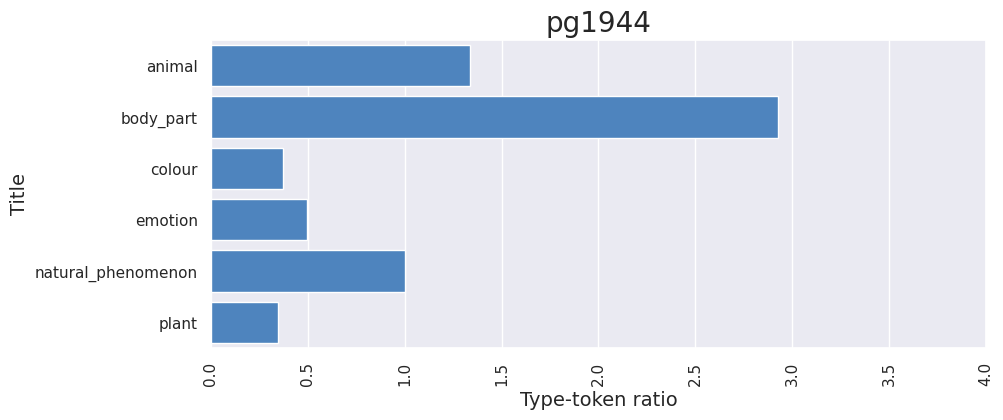



Most common emotions in "pg1944"

love (34); fear (18); happiness (16); terror (15); quiver (12); joy (9); anger (9); spite (7); shudder (6); fright (6); dread (4); alarm (4); fit (3); rage (3); rapture (2); 

Most common colours in "pg1944"

red (42); black (31); green (23); yellow (9); crimson (8); blue (8); brown (5); pink (2); teal (1); purple (1); 

Most common body_parts in "pg1944"

face (141); eye (119); hand (115); head (107); back (79); foot (53); arm (32); shoulder (27); nose (26); neck (23); leg (19); cheek (18); ear (16); finger (15); lip (15); 

Most common natural phenomena in "pg1944"

light (69); wind (22); snow (22); cloud (19); low (18); weather (17); quiet (17); storm (13); drag (13); rain (13); smoke (13); moonlight (12); heat (11); mist (11); thrust (8); 

Most common animals in "pg1944"

horse (71); dog (37); fish (36); fly (30); bird (28); sheep (21); cow (16); cattle (13); bear (13); nightingale (9); goose (7); geese (7); bull (7); pigeon (6); duck (6); 

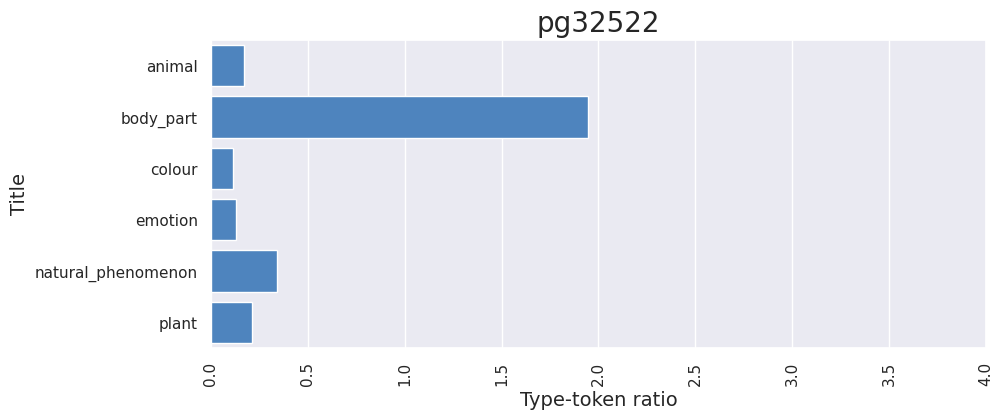



Most common emotions in "pg32522"

alarm (3); shudder (1); panic (1); hate (1); fit (1); fright (1); nervousness (1); 

Most common colours in "pg32522"

black (5); red (2); green (1); 

Most common body_parts in "pg32522"

back (36); brain (21); head (11); eye (9); hand (9); small (8); face (7); arm (6); foot (4); finger (4); jaw (3); shoulder (3); pseudopodium (2); nose (1); muscle (1); 

Most common natural phenomena in "pg32522"

light (9); wind (2); heat (2); gravity (2); ray (1); pressure (1); puff (1); quiet (1); drift (1); flood (1); smoke (1); low (1); current (1); 

Most common animals in "pg32522"

goat (4); fish (2); insect (1); duck (1); mount (1); entire (1); bear (1); mankind (1); 

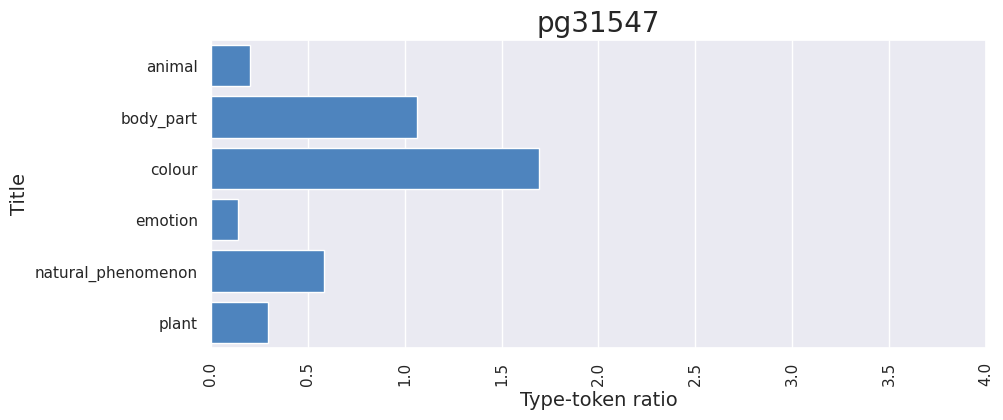



Most common emotions in "pg31547"

terror (2); hate (2); shudder (1); fright (1); grievance (1); panic (1); malevolence (1); 

Most common colours in "pg31547"

red (102); black (3); green (2); gray (1); blue (1); yellow (1); 

Most common body_parts in "pg31547"

back (16); small (16); eye (9); head (6); quick (4); hand (3); arm (2); foot (2); face (2); skin (2); leaflet (1); finger (1); receptor (1); nerve (1); vessel (1); 

Most common natural phenomena in "pg31547"

low (8); smokes (8); quiet (3); thunderstorm (2); light (2); gravity (2); pressure (2); arc (1); drift (1); interrupt (1); chop (1); flood (1); energy (1); thrust (1); trajectory (1); 

Most common animals in "pg31547"

pet (4); charger (2); giant (2); bird (1); rodent (1); crab (1); entire (1); fly (1); 

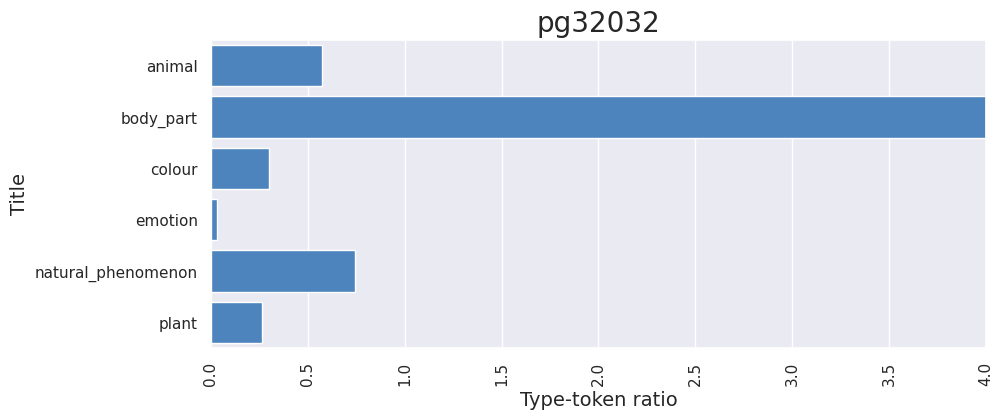



Most common emotions in "pg32032"

shudder (1); hate (1); panic (1); 

Most common colours in "pg32032"

gray (14); blue (3); black (2); blackness (2); red (2); yellow (1); complexion (1); brown (1); grayness (1); green (1); 

Most common body_parts in "pg32032"

back (65); claw (50); eye (28); arm (27); face (26); hand (24); small (21); head (19); foot (18); finger (12); lid (12); ear (7); mouth (7); leg (7); lip (5); 

Most common natural phenomena in "pg32032"

radiation (12); light (10); cloud (7); drift (5); heat (5); clouds (4); bolt (4); quiet (3); pressure (3); mist (2); drag (2); wind (2); low (2); sunlight (2); arc (1); 

Most common animals in "pg32032"

bear (17); fly (10); rat (6); lizard (5); crab (3); ant (3); duck (2); bird (2); snake (1); locust (1); dog (1); giant (1); rats (1); mount (1); 

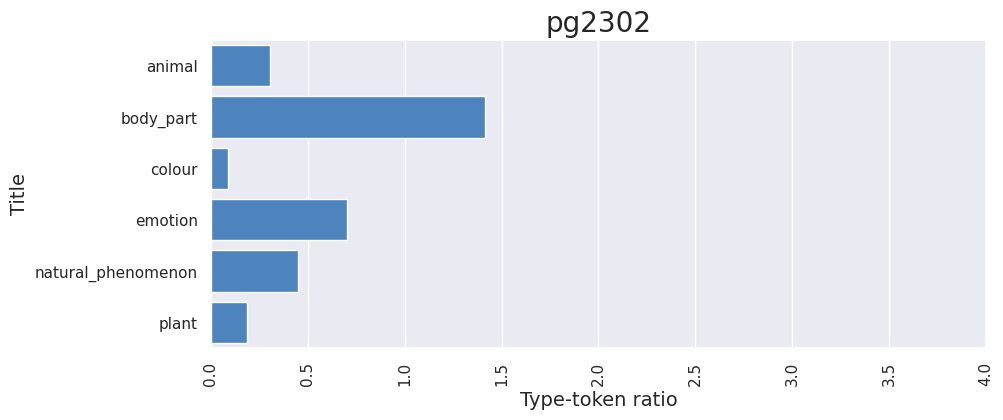



Most common emotions in "pg2302"

love (57); fear (16); happiness (14); joy (12); temper (7); horror (5); dread (5); alarm (4); terror (4); fit (4); devotion (4); anger (3); vexation (3); exaltation (2); premonition (2); 

Most common colours in "pg2302"

red (6); black (6); blue (3); yellow (3); pallor (2); drab (1); green (1); 

Most common body_parts in "pg2302"

hand (67); head (43); eye (37); face (32); foot (20); small (16); breast (14); ear (11); cheek (10); back (9); tongue (6); mouth (6); arm (5); lip (5); finger (5); 

Most common natural phenomena in "pg2302"

light (17); quiet (12); rain (11); mist (9); weather (8); exchange (5); wind (4); cloud (4); low (4); smoke (3); snow (3); breeze (3); drag (3); sleet (3); dew (2); 

Most common animals in "pg2302"

bird (13); bear (12); fly (9); entire (4); rat (4); stray (3); dog (3); hare (3); mankind (2); owl (2); fish (2); nestling (1); bee (1); worm (1); raven (1); 

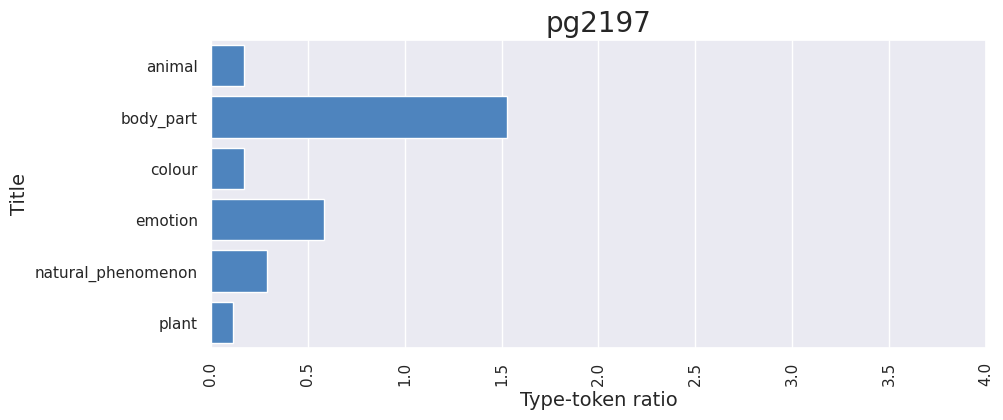



Most common emotions in "pg2197"

love (48); fear (14); anger (11); alarm (7); fit (5); temper (4); excitement (4); joy (4); fright (3); consternation (3); presentiment (3); ecstasy (3); uneasiness (3); fury (3); spite (3); 

Most common colours in "pg2197"

red (24); black (14); blue (2); scarlet (1); tint (1); purple (1); green (1); pink (1); yellow (1); 

Most common body_parts in "pg2197"

hand (92); eye (56); face (51); head (35); back (27); foot (23); lip (12); shoulder (11); small (9); brain (9); tongue (7); arm (7); cheek (6); neck (6); knee (6); 

Most common natural phenomena in "pg2197"

interrupt (18); light (13); exchange (8); low (6); gravity (4); smoke (3); quiet (3); bond (3); rain (2); quake (2); cloud (2); thrust (2); deposit (2); attraction (2); snow (1); 

Most common animals in "pg2197"

bear (11); horse (8); bird (4); mademoiselle (2); stork (2); cockerel (2); fly (2); cricket (1); spaniel (1); pet (1); entire (1); rat (1); chick (1); goat (1); bug (1); 

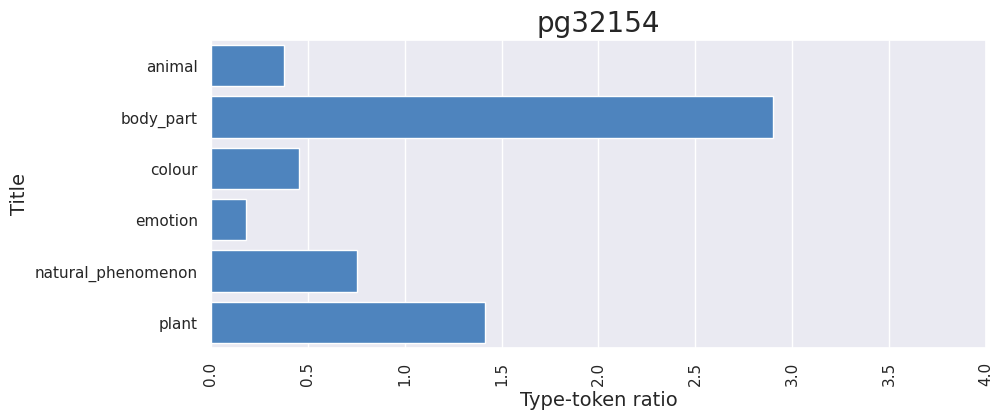



Most common emotions in "pg32154"

fear (7); excitement (6); fit (2); shudder (2); alarm (2); apprehension (1); panic (1); rage (1); quiver (1); fits (1); terror (1); horror (1); hate (1); 

Most common colours in "pg32154"

black (23); gray (18); green (10); blue (9); yellow (3); grayness (3); scarlet (1); brown (1); red (1); 

Most common body_parts in "pg32154"

back (78); hand (54); eye (47); face (41); head (30); foot (26); small (18); finger (16); arm (15); mouth (10); lip (9); knee (8); leg (5); wrist (5); neck (5); 

Most common natural phenomena in "pg32154"

light (30); cloud (14); drift (8); energy (7); tornado (6); drag (5); arc (4); smoke (4); clouds (4); cataclysm (3); wind (3); low (3); heat (3); interrupt (2); gas (2); 

Most common animals in "pg32154"

horse (20); fly (9); entire (4); mount (4); ant (3); rabbit (3); bird (3); bug (2); hind (1); gnat (1); giant (1); snake (1); dog (1); rat (1); drone (1); 

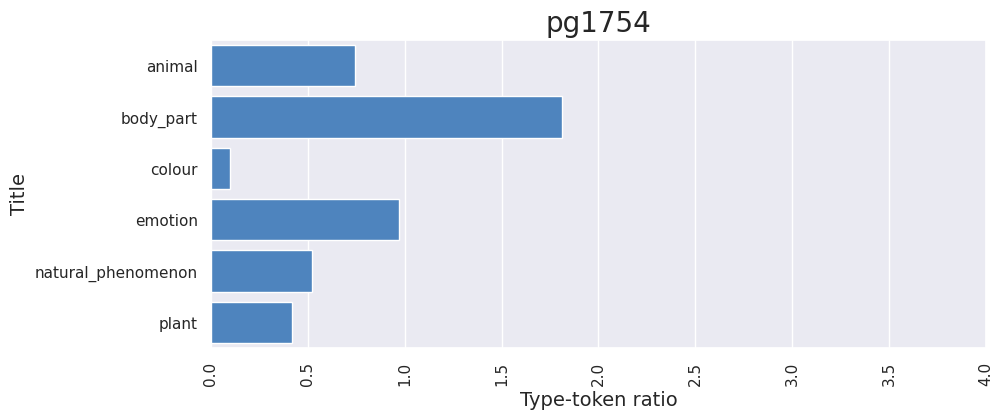



Most common emotions in "pg1754"

love (52); fear (5); happiness (4); temper (4); dread (4); anger (4); jealousy (4); joy (3); excitement (3); horror (3); hate (2); exaltation (2); envy (2); rapture (1); thrill (1); 

Most common colours in "pg1754"

black (5); red (2); blue (2); claret (1); 

Most common body_parts in "pg1754"

hand (38); eye (31); back (24); head (20); foot (11); face (9); arm (6); breast (6); brain (5); shoulder (4); forehead (4); leg (3); knee (3); mouth (2); shin (2); 

Most common natural phenomena in "pg1754"

light (13); low (6); quiet (4); wind (4); cloud (3); drag (3); moonlight (3); weather (2); smoke (2); ray (2); fume (2); storm (2); mist (1); glowing (1); thrust (1); 

Most common animals in "pg1754"

horse (16); fish (8); dog (4); rat (4); fly (3); seagull (3); bear (3); storks (2); bird (2); hound (2); pet (2); beetle (2); drone (2); starfish (2); spider (2); 

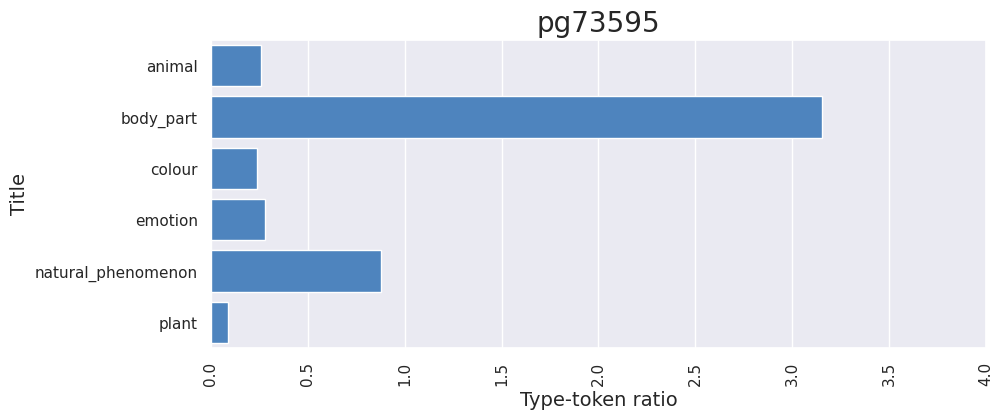



Most common emotions in "pg73595"

anger (10); fear (3); rage (2); excitement (1); fit (1); bitterness (1); resentment (1); alarm (1); hate (1); happiness (1); tingle (1); envy (1); hesitancy (1); 

Most common colours in "pg73595"

green (7); black (5); blue (4); red (4); brown (1); 

Most common body_parts in "pg73595"

hand (54); head (28); back (24); eye (19); foot (18); face (15); mouth (10); small (8); arm (7); lip (7); throat (7); shoulder (7); finger (6); palm (5); tongue (5); 

Most common natural phenomena in "pg73595"

light (14); wind (7); low (7); smoke (7); chop (4); puff (4); haze (3); current (3); thrust (3); cloud (3); pressure (2); sunlight (2); quiet (2); exchange (2); storm (2); 

Most common animals in "pg73595"

frog (6); dun (2); entire (2); fly (1); jackrabbit (1); bear (1); bird (1); dove (1); frogs (1); dog (1); steed (1); fish (1); tadpoles (1); lamb (1); bee (1); 

In [63]:
import warnings
warnings.filterwarnings("ignore")

def wordnet_hypernyms(token):
    all_hypernyms = []
    black_list = ['queen','young','human']

    if token not in black_list:

        word_senses = wn.synsets(token)

        hypernyms = lambda s: s.hypernyms()

        return_value = False

        for ws in word_senses:

            hypernyms = [hyp.name() for hyp in list(ws.closure(hypernyms))]

            if 'plant.n.02' in hypernyms:
                all_hypernyms.append('plant')
            if 'color.n.01' in hypernyms:
                all_hypernyms.append('colour')
            if 'emotion.n.01' in hypernyms:
                all_hypernyms.append('emotion')
            if 'animal.n.01' in hypernyms:
                all_hypernyms.append('animal')
            if 'natural_phenomenon.n.01' in hypernyms:
                all_hypernyms.append('natural_phenomenon')
            if 'body_part.n.01' in hypernyms:
                all_hypernyms.append('body_part')

    return all_hypernyms

for file in os.listdir(directory):

    if re.search( 'lemma.txt',file ):
        data = []

        key = os.path.join(directory,re.sub('_lemma','',file))
        title = find_title(key)
        path = os.path.join(directory,file)
        with open(path,encoding='utf') as fh:
            full_text = fh.read()
            words = word_tokenize(full_text.lower())
            words = clean_wordlist(words)
            freq = Counter(words)

            for word,count in freq.most_common():
                hypernyms = wordnet_hypernyms(word)
                if len(hypernyms)>0:
                    for h in hypernyms:
                        row = []
                        row.append(word)
                        row.append(h)
                        row.append(count)
                        data.append(row)

        df = pd.DataFrame(data,columns=['word','domain','count'])



        x_axis = list(df.groupby('domain')['count'].sum().to_dict().values())
        # normalise values
        x_axis = [(value/nr_tokens[key])*100 for value in x_axis]
        y_axis = list(df.groupby('domain')['count'].sum().to_dict().keys())

        colours = ['#599ad3','#f9a65a']

        fig = plt.figure( figsize=( 10,4 ) )

        graph = sns.barplot( x=x_axis, y=y_axis,
                            color = '#3b83d1' , dodge = False)

        graph.set_title(title , size = 20)
        graph.set_xlabel('Type-token ratio' , size = 14)
        graph.set_ylabel('Title' , size = 14 )

        graph.set_xlim(0,4)


        plt.xticks(rotation= 90)

        plt.show()

        print(f'\n\nMost common emotions in "{find_title(key)}"\n')

        count = 0
        for i,row in df.query(' domain=="emotion" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break

        print(f'\n\nMost common colours in "{find_title(key)}"\n')

        count = 0
        for i,row in df.query(' domain=="colour" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break

        print(f'\n\nMost common body_parts in "{find_title(key)}"\n')

        count = 0
        for i,row in df.query(' domain=="body_part" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break


        print(f'\n\nMost common natural phenomena in "{find_title(key)}"\n')

        count = 0
        for i,row in df.query(' domain=="natural_phenomenon" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break

        print(f'\n\nMost common animals in "{find_title(key)}"\n')

        count = 0
        for i,row in df.query(' domain=="animal" ').sort_values(by='count',ascending=False).iterrows():
            print(f"{row['word']} ({row['count']})" , end= '; ' )
            count += 1
            if count==15:
                break


## Sentiment analysis

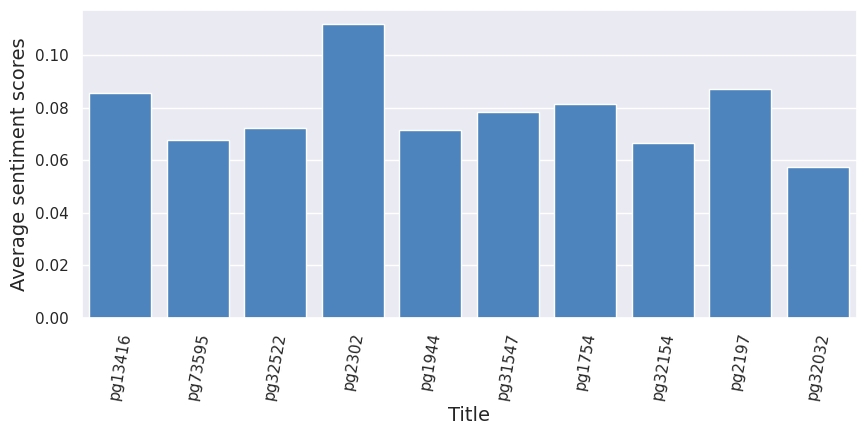

In [64]:

def average_score(file):
    all_scores = []
    file = open( file , encoding = 'utf-8' )
    full_text = file.read()
    sentences = sent_tokenize( full_text )
    for s in sentences:
        scores = ana.polarity_scores(s)
        all_scores.append( scores["pos"] )
    return sum(all_scores)/len(all_scores)

sent_scores = dict()

for text in corpus:

    avg_score = average_score(text)
    sent_scores[text]=avg_score


x_axis = list(sent_scores.keys())
y_axis = list(sent_scores.values())

x_axis = [find_title(text) for text in x_axis]

fig = plt.figure( figsize=( 10,4 ) )

graph = sns.barplot( x=x_axis, y=y_axis,
                    color = '#3b83d1' , dodge = False )

#graph.set_title( '' , size = 20)
graph.set_xlabel('Title' , size = 14 )
graph.set_ylabel('Average sentiment scores' , size = 14)


plt.xticks(rotation= 80)

plt.show()